In [1]:
import experiment_setup.exp_delft_large
from experiment.scenario import *
from pathlib import Path
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from experiment.utils import scan_freq_from_pulse_freq_via_point_spacing, point_spacing_along, point_spacing_across, rms

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Experiment Test Case with Random Error

In [2]:
**Update: Independent ALS simulation and random error introduction**

Updated folder structure:

- 01_input
- 02_settings
- 03_scene
- 04_survey
- 05_point_clouds
- 06_reconstruction
- 07_evaluation

One settings dictionary vs. two settings dictionaries?

One dictionary:

- Explicitly states the survey settings (mainly pulse frequency) for each scenario, even if they repeat
- Requires parsing of the contained survey settings to ensure that surveys with identical settings are only simulated once
- Allows identification of each scenario's settings at a single glance, without referencing settings from a second dictionary
- More verbose, but simpler structure

Two dictionaries:

- No need to repeat identical pulse frequencies for multiple scenarios, instead add reference to corresponding survey setting
- No need to parse the scenario dictionary to identify unique survey settings
- To get complete settings for single scenario including its survey settings, the reference to the second dictionary must be dissolved
- Less verbose, but more complicated structure for the user to set up


In [3]:
from experiment_setup.exp_random_error import *

In [4]:
# for i, s in enumerate(scenario_settings):
#     print(i)
#     print(point_spacing_along(velocity, s["scan_freq_hz"]))
#     print(point_spacing_across(altitude, scan_angle_deg, s["pulse_freq_hz"], s["scan_freq_hz"]))
#     print()

Running 'setup_survey' for scenario_000 ...

Finished 'setup_survey' for scenario_000 after 0:00:00.

Running 'setup_survey' for scenario_001 ...

Finished 'setup_survey' for scenario_001 after 0:00:00.

Running 'setup_survey' for scenario_002 ...

Finished 'setup_survey' for scenario_002 after 0:00:00.001005.

Running 'setup_survey' for scenario_003 ...

Finished 'setup_survey' for scenario_003 after 0:00:00.

Running 'setup_survey' for scenario_004 ...

Finished 'setup_survey' for scenario_004 after 0:00:00.

Running 'setup_survey' for scenario_005 ...

Finished 'setup_survey' for scenario_005 after 0:00:00.

Running 'setup_survey' for scenario_006 ...

Finished 'setup_survey' for scenario_006 after 0:00:00.

Running 'setup_survey' for scenario_007 ...

Finished 'setup_survey' for scenario_007 after 0:00:00.

Running 'setup_survey' for scenario_008 ...

Finished 'setup_survey' for scenario_008 after 0:00:00.

Running 'setup_survey' for scenario_009 ...

Finished 'setup_survey' for sc

In [5]:
## Reconstruction Optimization Test

['scenario_000', 'scenario_005', 'scenario_010', 'scenario_015', 'scenario_020']


In [6]:
e.setup()
len(e)

Running 'prepare_survey' for scenario_000 ...

Finished 'prepare_survey' for scenario_000 after 0:00:00.011001.

Running 'prepare_survey' for scenario_005 ...

Finished 'prepare_survey' for scenario_005 after 0:00:00.004997.

Running 'prepare_survey' for scenario_010 ...

Finished 'prepare_survey' for scenario_010 after 0:00:00.005001.

Running 'prepare_survey' for scenario_015 ...

Finished 'prepare_survey' for scenario_015 after 0:00:00.006006.

Running 'prepare_survey' for scenario_020 ...

Finished 'prepare_survey' for scenario_020 after 0:00:00.004994.



In [7]:
e.save()

Running 'run_survey' for scenario_000 ...

Building survey simulation ...
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 54.61301100000128 seconds
Starting survey simulation ...
Survey simulation running. Time elapsed: 99 s
Survey simulation has finished after 0:01:39.
Reading the coordinates in which the trajectories are parallel ...
Computing center coordinates between adjacent parallel trajectory coordinates ...
Reading input point clouds and computing within-cloud nearest-neighbor distance ...
Processing swath point cloud 1 of 5 ...
- Processed 573580 points.
Processing swath point cloud 2 of 5 ...
- Processed 602425 points.
Processing swath point cloud 3 of 5 ...
- Processed 611187 points.
Processing swath point cloud 4 of 5 ...
- Processed 605777 points.
Processing swath point cloud 5 of 5 ...
- Processed 576871 points.
Computing mean within-cloud nearest-neighbor distances ...
[0.9020465924962655, 0.9195912365749528, 0.929179728595586, 0.92802

In [8]:
e = Experiment.load(Path(experiment_dirpath, experiment_name))
len(e)

Running 'run_survey' for scenario_020 ...

Building survey simulation ...
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 31.211027400000603 seconds
Starting survey simulation ...
Survey simulation running. Time elapsed: 2255 s
Survey simulation has finished after 0:37:35.
Reading the coordinates in which the trajectories are parallel ...
Computing center coordinates between adjacent parallel trajectory coordinates ...
Reading input point clouds and computing within-cloud nearest-neighbor distance ...
Processing swath point cloud 1 of 5 ...
- Processed 9182019 points.
Processing swath point cloud 2 of 5 ...
- Processed 9647757 points.
Processing swath point cloud 3 of 5 ...
- Processed 9784451 points.
Processing swath point cloud 4 of 5 ...
- Processed 9695345 points.
Processing swath point cloud 5 of 5 ...
- Processed 9235427 points.
Computing mean within-cloud nearest-neighbor distances ...
[0.22591532089482433, 0.23230509469280855, 0.23458360370796

In [6]:
# sc = e[10]
sc = e[14]

Running 'process_point_cloud' for scenario_020 ...

Scenario `scenario_020`: Not adding noise to point cloud - zero error set.

Finished 'process_point_cloud' for scenario_020 after 0:00:00.008556.



In [7]:
sc.setup_reconstruction_optimization()

Running 'setup_reconstruction' for scenario_020 ...

Finished 'setup_reconstruction' for scenario_020 after 0:00:00.



In [8]:
sc.prepare_reconstruction_optimization()

Running 'prepare_reconstruction' for scenario_020 ...

Finished 'prepare_reconstruction' for scenario_020 after 0:00:00.008000.



In [9]:
log_fp = r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization\scenario_010\optimization_240829-131835.log"
sc.recon_optim.load_optimizer_state([log_fp])
sc.recon_optim.past_target_values.__len__()  # number of actual target values, excluding zero-buildings cases

Running 'run_reconstruction' for scenario_020 ...

Starting 3D building reconstruction ...

- Command: geof C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_delft_large_5x5/07_reconstruction/scenario_020/reconstruct.json --verbose --workdir --config C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_delft_large_5x5/07_reconstruction/scenario_020/config.toml
- Output log file: C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_delft_large_5x5\07_reconstruction\scenario_020\geoflow_log_240829-110118.txt

Finished 3D building reconstruction.
Finished 'run_reconstruction' for scenario_020 after 0:07:54.317564.



In [13]:
sc.run_reconstruction_optimization(init_points=20, n_iter=80)

Running 'setup_evaluation' for scenario_020 ...

Finished 'setup_evaluation' for scenario_020 after 0:00:00.139128.



In [15]:
After restarting the Kernel, load the optimization scenarios using the following code. Also, set up the evaluation to be able to access the summary statistics.

Running 'run_evaluation' for scenario_020 ...


Starting GeoflowOutputEvaluator ...


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:01.839866.


Starting CityJSONBuildingsEvaluator ...


Finished CityJSONBuildingsEvaluator after 0:00:06.582114.


Starting WavefrontOBJBuildingsEvaluator ...


Finished WavefrontOBJBuildingsEvaluator after 0:00:05.009880.


Finished GeoflowOutputEvaluator after 0:00:13.435825.

Finished 'run_evaluation' for scenario_020 after 0:00:13.435825.



In [19]:
sc.recon_optim.optim_experiment.load_scenarios()
len(sc.recon_optim.optim_experiment)

3043

sc.recon_optim.optim_experiment.run_step(Scenario.setup_evaluation, lods=["2.2"])

# sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection="complexity")
# sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection=["height", "area_volume_diff"])
sc.recon_optim.optim_experiment.run_step(Scenario.run_evaluation, evaluator_selection=["complexity", "height", "area_volume_diff", "geoflow_output"])

In [2]:
# sc.recon_optim.optim_experiment.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff"])
sc.recon_optim.optim_experiment.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff", "complexity", "height", "area_volume_diff", "geoflow_output"])

In [3]:
### Load a different optimization experiment for evaluation

e_opt = Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction_optimization\scenario_010")

In [4]:
e_opt.run_step(Scenario.setup_evaluation, lods=["2.2"])

25

In [5]:
e_opt.compute_summary_statistics(evaluator_selection=["iou_3d", "hausdorff", "complexity", "height", "area_volume_diff", "geoflow_output"])

Saving experiment configuration ...
Saving scenario configurations ...


In [7]:
# Take summary statistics from loaded experiment
s = e_opt.summary_stats
s

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...


25

In [5]:
# Take summary statistics from last executed optimization experiment
s = sc.recon_optim.optim_experiment.summary_stats
s

In [7]:
list(s.columns)

Setting up reconstruction optimization ...


In [8]:
columns = []
columns.extend(list(default_config["reconstruction_config"]["geoflow_parameters"].keys()))
columns.extend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
columns.extend(["n_faces_22_mean", "n_faces_22_std"])
columns.extend(["area_22_mean_abs_diff"])

s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

Preparing reconstruction optimization ...


In [ ]:
plt.scatter(range(100), s["iou_22_mean"])
plt.scatter(range(100), s["hausdorff_22_rms"])
plt.scatter(range(100), s["rms_min_dist_22_mean"])
plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
plt.ylim(.2, 0.95)
plt.show()

In [9]:
### Optimized metrics' influence on target metrics

Check influence on:
- iou_22_mean
- hausdorff_22_rms
- rms_min_dist_22_mean
- n_faces_22_mean

Running reconstruction optimization ...


Starting optimization scenario 'optim_0000' with the following settings:
{
  "r_line_epsilon": 0.4370861069626263,
  "r_optimisation_data_term": 9.75357153204958,
  "r_plane_epsilon": 1.4907884894416696,
  "r_plane_min_points": 22,
  "thres_alpha": 0.24041677639819287,
  "thres_reg_line_dist": 0.2403950683025824,
  "thres_reg_line_ext": 1.116167224336399,
  "r_plane_k": 22,
  "scenario_name": "optim_0000"
}

Starting 3D building reconstruction ...

- Command: geof C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_random_error_5x5/06_reconstruction_optimization/scenario_014/07_reconstruction/optim_0000/reconstruct.json --verbose --workdir --config C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_random_error_5x5/06_reconstruction_optimization/scenario_014/07_reconstruction/optim_0000/config.toml
- Output log file: C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_rand

for opt_metric in glb.geoflow_optim_parameter_space.keys():
    opt_metric = opt_metric.split("_", 1)[1]
    s.plot.scatter(opt_metric, "rms_min_dist_22_mean")

In [5]:
### Target metrics correlation 

100

In [10]:
ax = s.plot.scatter("iou_22_mean", "hausdorff_22_rms")
# plt.xlim(0.98, 0.9825)
# plt.ylim(0.67, 0.77)
ax = s.plot.scatter("hausdorff_22_rms", "iou_22_mean")

Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.039000.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.038035.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.036000.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.035001.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.037964.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.044999.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.046007.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.053029.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after 

In [11]:
s.plot.scatter("iou_22_mean", "rms_min_dist_22_mean")
# plt.xlim(0.98, 0.9825)
# plt.ylim(0.05, 0.06)
s.plot.scatter("rms_min_dist_22_mean", "iou_22_mean")

Running 'run_evaluation' for optim_0000 ...


Starting ComplexityEvaluator ...
Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.053012.

Starting HeightEvaluator ...
Loading CityJSON files ...
Reading building heights from output CityJSON file ...
Reading building heights from input CityJSON file ...
Computing building height differences ...

Finished HeightEvaluator after 0:00:04.154081.

Starting AreaVolumeDifferenceEvaluator ...
Setting up both AreaVolumeEvaluators ...
Running AreaVolumeEvaluator for 9-276-556.city.json ...

Starting AreaVolumeEvaluator ...
Running FME pipelines for each LOD ...

Executing FME workspace with command:

C:\Program Files\FME\fme.exe
C:\Users\Florian\OneDrive - TUM\Universität\24\Master's Thesis\Code\city-to-scan-to-city\experiment\computation_area_volume.fmw
--SourceDataset_CITYJSON
C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\01_input\9-276-556.city.json
--SourceDataset_CITYJSON

In [12]:
s.plot.scatter("hausdorff_22_rms", "rms_min_dist_22_mean")
s.plot.scatter("rms_min_dist_22_mean", "hausdorff_22_rms")

### Target metrics vs. complexity

In [53]:
s.plot.scatter("n_faces_22_mean", "iou_22_mean")
s.plot.scatter("n_faces_22_mean", "hausdorff_22_rms")
plt.ylim(1, 2)
s.plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")
plt.ylim(.2, .4)

Loading experiment configuration ...
File `scenario_settings.json` not found.
File `scene_parts.json` not found.
Initializing experiment ...
Loading scenarios ...


In [57]:
### Derived metrics vs. complexity

Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.036613.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.038054.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.040522.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.037033.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.035042.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.039447.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.039982.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.037571.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after 

In [58]:
s.plot.scatter("n_faces_22_mean", "volume_22_mean_abs_diff")
s.plot.scatter("n_faces_22_mean", "area_22_mean_abs_diff")
s.plot.scatter("n_faces_22_mean", "h_70p_mean_abs_diff")


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.051985.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.066502.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.064010.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.066551.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.058518.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.054518.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.048000.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.052045.


Starting GeopackageBuildingsEvaluator ...


Finished GeopackageBuildingsEvaluator after 0:00:00.067552.


Starting GeopackageBuildingsEvaluator ...


F

In [60]:
### Volume diff vs. target metrics

,pulse_freq_hz,point_spacing_along,point_spacing_across,std_horizontal_error,std_vertical_error,r_plane_epsilon,r_plane_k,r_plane_min_points,r_plane_normal_angle,thres_alpha,...,volume_22_norm_rms_abs_diff,gpkg_total_22,gpkg_unique_22,gpkg_multiple_22,cj_buildings,cj_building_parts,cj_buildings_with_bp,cj_buildings_zero_bp,cj_buildings_one_bp,cj_buildings_multiple_bp
name,,,,,,,,,,,,,,,,,,,,,
optim_0000,125000,0.277794,0.092598,0.0,0.0,0.758795,22,22,0.75,0.162407,...,0.022078,89,89,0,90,89,89,1,89,0
optim_0001,125000,0.277794,0.092598,0.0,0.0,0.737265,10,10,0.75,0.487964,...,0.020671,89,89,0,90,89,89,1,89,0
optim_0002,125000,0.277794,0.092598,0.0,0.0,0.373818,20,20,0.75,0.272778,...,0.017212,89,89,0,90,89,89,1,89,0
optim_0003,125000,0.277794,0.092598,0.0,0.0,0.429726,19,19,0.75,0.414070,...,0.016584,89,89,0,90,89,89,1,89,0
optim_0004,125000,0.277794,0.092598,0.0,0.0,0.646790,13,13,0.75,0.126021,...,0.023041,89,89,0,90,89,89,1,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
optim_0095,125000,0.277794,0.092598,0.0,0.0,0.398144,10,10,0.75,0.139118,...,0.020850,89,89,0,90,89,89,1,89,0
optim_0096,125000,0.277794,0.092598,0.0,0.0,0.100000,21,21,0.75,0.100000,...,0.017611,89,89,0,90,89,89,1,89,0
optim_0097,125000,0.277794,0.092598,0.0,0.0,0.483003,18,18,0.75,0.114898,...,0.024798,89,89,0,90,89,89,1,89,0


In [13]:
s.plot.scatter("iou_22_mean", "volume_22_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "volume_22_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "volume_22_mean_abs_diff")

,pulse_freq_hz,point_spacing_along,point_spacing_across,std_horizontal_error,std_vertical_error,r_plane_epsilon,r_plane_k,r_plane_min_points,r_plane_normal_angle,thres_alpha,...,volume_22_norm_rms_abs_diff,gpkg_total_22,gpkg_unique_22,gpkg_multiple_22,cj_buildings,cj_building_parts,cj_buildings_with_bp,cj_buildings_zero_bp,cj_buildings_one_bp,cj_buildings_multiple_bp
name,,,,,,,,,,,,,,,,,,,,,
optim_0000,125000,0.277794,0.092598,1.0,0.3,1.490788,22,22,0.75,0.240417,...,0.070249,87,87,0,90,87,87,3,87,0
optim_0001,125000,0.277794,0.092598,1.0,0.3,1.445338,10,10,0.75,0.972919,...,0.080354,86,86,0,90,86,86,4,86,0
optim_0002,125000,0.277794,0.092598,1.0,0.3,0.678060,20,20,0.75,0.488751,...,0.092780,87,87,0,90,87,87,3,87,0
optim_0003,125000,0.277794,0.092598,1.0,0.3,0.796088,19,19,0.75,0.806658,...,0.104034,87,87,0,90,87,87,3,87,0
optim_0004,125000,0.277794,0.092598,1.0,0.3,1.254335,13,13,0.75,0.158546,...,0.031530,83,83,0,90,83,83,7,83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
optim_0095,125000,0.277794,0.092598,1.0,0.3,1.610596,20,20,0.75,0.156831,...,0.078210,84,84,0,90,84,84,6,84,0
optim_0096,125000,0.277794,0.092598,1.0,0.3,1.012304,13,13,0.75,1.000000,...,0.055260,88,88,0,90,88,88,2,88,0
optim_0097,125000,0.277794,0.092598,1.0,0.3,0.676104,14,14,0.75,1.000000,...,0.062277,87,86,1,90,87,86,4,85,1


In [13]:
### Area diff vs. target metrics

['pulse_freq_hz',
 'point_spacing_along',
 'point_spacing_across',
 'std_horizontal_error',
 'std_vertical_error',
 'r_plane_epsilon',
 'r_plane_k',
 'r_plane_min_points',
 'r_plane_normal_angle',
 'thres_alpha',
 'r_line_epsilon',
 'thres_reg_line_dist',
 'thres_reg_line_ext',
 'r_optimisation_data_term',
 'r_normal_k',
 'iou_22_rms',
 'iou_22_mean',
 'iou_22_median',
 'iou_22_min',
 'iou_22_max',
 'hausdorff_22_rms',
 'hausdorff_22_mean',
 'hausdorff_22_median',
 'hausdorff_22_min',
 'hausdorff_22_max',
 'rms_min_dist_22_rms',
 'rms_min_dist_22_mean',
 'rms_min_dist_22_median',
 'rms_min_dist_22_min',
 'rms_min_dist_22_max',
 'n_faces_22_count',
 'n_faces_22_mean',
 'n_faces_22_std',
 'n_faces_22_min',
 'n_faces_22_median',
 'n_faces_22_max',
 'h_min_out_count',
 'h_min_out_mean',
 'h_min_out_std',
 'h_min_out_min',
 'h_min_out_25%',
 'h_min_out_50%',
 'h_min_out_75%',
 'h_min_out_max',
 'h_min_mean_diff',
 'h_min_median_diff',
 'h_min_mean_abs_diff',
 'h_min_median_abs_diff',
 'h_mi

In [31]:
s.plot.scatter("iou_22_mean", "area_22_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "area_22_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "area_22_mean_abs_diff")

,r_plane_epsilon,r_plane_k,r_plane_min_points,r_plane_normal_angle,thres_alpha,r_line_epsilon,thres_reg_line_dist,thres_reg_line_ext,r_optimisation_data_term,r_normal_k,iou_22_mean,hausdorff_22_rms,rms_min_dist_22_mean,n_faces_22_mean,n_faces_22_std,area_22_mean_abs_diff
name,,,,,,,,,,,,,,,,
optim_0016,1.303467,27,27,0.75,0.823305,0.936728,0.267913,2.785118,9.040602,5,0.858894,1.295911,0.253186,443.413793,606.508528,41.316818
optim_0059,1.265329,14,14,0.75,0.351912,1.000000,0.282186,1.871144,7.349239,5,0.864011,1.313796,0.245425,239.348315,284.785489,36.759146
optim_0089,1.056012,29,29,0.75,1.000000,0.100000,1.000000,1.684966,9.794827,5,0.871038,1.596379,0.282354,117.170732,126.031135,26.669947


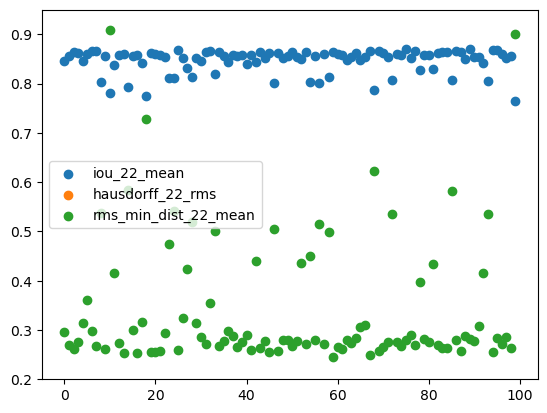

In [20]:
### Height diff vs. target metrics

s.plot.scatter("iou_22_mean", "h_70p_mean_abs_diff")
s.plot.scatter("hausdorff_22_rms", "h_70p_mean_abs_diff")
s.plot.scatter("rms_min_dist_22_mean", "h_70p_mean_abs_diff")